In [1]:
pip install ftfy

     |████████████████████████████████| 64 kB 2.0 MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=3d46501b26b9ff06fafb1fb27977285bd3ddffedc5af569602a20ba3cd15ffe7
  Stored in directory: /root/.cache/pip/wheels/19/f5/38/273eb3b5e76dfd850619312f693716ac4518b498f5ffb6f56d
Successfully built ftfy


In [2]:
pip install textblob

In [3]:
pip install langdetect

     |████████████████████████████████| 981 kB 5.1 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=0646d659bbfb627c6dc6e03f5a289029488cb109fe5e3f970c67919221a00d9f
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [4]:
pip install deep-translator

     |████████████████████████████████| 97 kB 3.8 MB/s 
     |████████████████████████████████| 97 kB 6.6 MB/s 
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.0.3 which is incompatible.


In [5]:
pip install contractions

     |████████████████████████████████| 321 kB 5.7 MB/s 
     |████████████████████████████████| 284 kB 46.0 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85449 sha256=fb1ef883e16e5c9a00be77d6acf5d0053534f9c3b60c8a2fe77908261f8b67e0
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [6]:
 pip install pyspellchecker 

     |████████████████████████████████| 2.7 MB 5.3 MB/s 


In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
from spellchecker import SpellChecker

In [9]:
import re

In [10]:
import ftfy

In [11]:
import contractions

In [12]:
from deep_translator import GoogleTranslator

In [13]:
import string
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [14]:
from textblob import TextBlob
from langdetect import detect
from langdetect import detect_langs

In [15]:
from wordcloud import WordCloud

In [153]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [16]:
seed = 32

In [17]:
pd.set_option('display.max_colwidth', None)

In [18]:
ata_path = "/content/drive/MyDrive/GL/ATA/input_data.xlsx"
print(ata_path)

/content/drive/MyDrive/GL/ATA/input_data.xlsx


In [19]:
def remove_lead_trail_space(text):
  return text.strip()

In [20]:
def convert_to_lowercase(text):
  return text.lower()

In [21]:
def remove_punctuation(text):
    PUNCT_TO_REMOVE = string.punctuation
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

In [22]:
def remove_digits(text):
  digits_rem = ''.join((x for x in text if not x.isdigit()))
  return digits_rem

In [23]:
def remove_stopwords(text):
    STOPWORDS = set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

In [24]:
def lemmetize_text(text):
  lemmatizer = WordNetLemmatizer()
  word_list = nltk.word_tokenize(text)
  lemmatized_output = ' '.join([lemmatizer.lemmatize(word) for word in word_list])
  return lemmatized_output

In [25]:
def clean_mojibake(text):
  cleaned_mojibake = ftfy.fix_text(text)
  return cleaned_mojibake

In [26]:
def translate_to_english(text):
  translated_text = text
  if len(text)>0:
    if (detect(text) != 'en'):
      translated_text = GoogleTranslator(source='auto', target='english').translate(text)
  return translated_text

In [27]:
def remove_linebreaks(text):
  text = text.replace("\r"," ")
  text = text.replace("\n"," ")
  text = text.replace("\t"," ")
  return text

In [28]:
def extract_received_from_mail(text):
  return_text = ""
  match = re.search(r'received from: [\w\.-]+@[\w\.-]+', text)
  if bool(match):
    mail_match = re.search(r'[\w\.-]+@[\w\.-]+', match.group(0))
    return_text = mail_match.group(0)
  else:
    return_text = "No Match"
  return return_text

In [29]:
def extract_subject_from_mail(text):
  return_subject = ""
  match_subject = re.search(r'subject:.*[\r\n\t\f\v]', text)
  if bool(match_subject):
    return_subject = match_subject.group(0).replace('subject:',"")
    return_subject = remove_linebreaks(return_subject)
    return_subject = remove_lead_trail_space(return_subject)
  else:
    return_subject = "No Match"
  return return_subject

In [30]:
def remove_received_from_mail(text):
  match = re.search(r'received from: [\w\.-]+@[\w\.-]+', text)
  if bool(match):
    text = text.replace(match.group(0),"")
  return text

In [31]:
def remove_email(text):
  matched_emails = re.findall('\S+@\S+', text)

  for email in matched_emails:
    text = text.replace(email,"")
  return text

In [32]:
def removed_from_to_sent_date(text):
  ## Removes the occurances of 
  ## from: till any of the line breaks
  ## to: till any of the line breaks
  ## sent: till any of the line breaks
  ## date: till any of the line breaks
  ## cc: till any of the line breaks
  ## subject: till any of the line breaks
  ## importance: till any of the line breaks

  
  match_mailto = re.findall(r'<mailto:.*>', text)
  match_from = re.findall(r'from:.*[\r\n]', text)
  match_to = re.findall(r'to:.*[\r\n]', text)
  match_sent = re.findall(r'sent:.*[\r\n]', text) 
  match_date = re.findall(r'date:.*[\r\n]', text)
  match_cc = re.findall(r'cc:.*[\r\n]', text)
  match_subject = re.findall(r'subject:.*[\r\n]', text)
  match_importance = re.findall(r'importance:.*[\r\n]', text)
  match_first_name = re.findall(r'first name.*[\r\n]', text)
  match_last_name = re.findall(r'last name.*[\r\n]', text)
  match_user_name_space = re.findall(r'user name:.*[\r\n]', text)
  match_user_name = re.findall(r'username:.*[\r\n]', text)
  match_name = re.findall(r'name:.*[\r\n]', text)
  match_language = re.findall(r'language:.*[\r\n]', text)
  match_browser = re.findall(r'browser:.*[\r\n]', text)
  match_mail_id = re.findall(r'mail id:.*[\r\n]', text)
  match_email_address = re.findall(r'email address:.*[\r\n]', text)
  match_email = re.findall(r'email:.*[\r\n]', text)
  match_customernumber = re.findall(r'customer number:.*[\r\n]', text)
  match_customerjobtitle = re.findall(r'customer job title:.*[\r\n]', text)
  match_telephone = re.findall(r'telephone:.*[\r\n]', text)
  match_contact = re.findall(r'contact #:.*[\r\n]', text)
  match_vit_ref_num = re.findall(r'vitalyst reference number:.*[\r\n]', text)
  match_supervisor = re.findall(r'supervisor:.*[\r\n]', text)
  match_manager = re.findall(r'manager.*[\r\n]', text)
  match_i_number = re.findall(r'i number:.*[\r\n]', text)
  match_cost_center = re.findall(r'cost center.*[\r\n]', text)
  match_ext_comp = re.findall(r'external company name.*[\r\n]', text)
  match_emp_id = re.findall(r'emp id:.*[\r\n]', text)
  match_emb_image = re.findall(r'\[cid:image.*\]', text)
  match_begin_fwd_msg = re.findall(r'begin forwarded message:', text)
  match_sent_from_iphone = re.findall(r'(sent from my iphone|sent from my ipad)', text)
  match_sir_madam = re.findall(r'(sir or madam,|sir/mam,|sir,)', text)
  match_yes_no_na_option = re.findall(r'(\(yes/no/na\))', text)
  match_summary = re.findall(r'summary:', text)

  all_matches = match_mailto + match_from + match_to + match_sent + match_date + match_cc + match_subject + match_importance + match_first_name + match_last_name + match_user_name_space + match_user_name + match_name + match_language + match_browser + match_mail_id + match_email_address + match_email + match_customernumber + match_telephone + match_summary + match_customerjobtitle + match_contact + match_vit_ref_num + match_supervisor + match_manager + match_i_number + match_cost_center + match_ext_comp + match_emp_id + match_emb_image + match_begin_fwd_msg + match_sent_from_iphone + match_sir_madam + match_yes_no_na_option

  for matched_text in all_matches:
    text = text.replace(matched_text, "")

  return text

In [33]:
def remove_greetings(text):
  match_greetings = re.search(r'(^|\s)(good day|good afternoon|good morning|good evening)(,|\s|!|.|:)', text)
  if bool(match_greetings):
    text = text.replace(match_greetings.group(0),"")
  return text

In [34]:
def remove_best_wishes(text):
  match_bestwishes = re.search(r'(with best|best|with kind|kind|many|with warm|warm)$', text)
  if bool(match_bestwishes):
    text = text.replace(match_bestwishes.group(0),"")
  return text

In [35]:
def remove_hello_wishes(text):
  match_hellowishes = re.search(r'(hello i.t. team|hello help-team|hello support team|hello help-team|hello it-team|hello ladies and gentlemen|hello  it helper|hellow|hello it support|hello all|hello colleagues|hi there|hello it team|hello sir|hello it service|hello it|hello helpdesk|hello team|hello all|hello it desk|hello  it helper|hello dac|hello|gentles|it team|dear all|dear it|dear|hallo|all groups|it help|team)(,|\s|!|.|:|;|<|~)', text)
  if bool(match_hellowishes):
    text = text.replace(match_hellowishes.group(0),"")
  return text

In [36]:
def remove_hi(text):
  match_hi = re.search(r'(hi it|hi team|hi it experts|hi)(,|\s|!|.|:)', text)
  if bool(match_hi):
    text = text.replace(match_hi.group(0),"")
  return text          

In [37]:
def remove_thanking(text):
  match_thanking = re.search(r'(thanking you|thanking u|thank u|thank you|thanks)(,|.|/s|$)', text)
  if bool(match_thanking):
    text = text.replace(match_thanking.group(0),"")
  return text

In [38]:
def expand_pls(text):
  match_pls = re.search(r'(pls)(\s|.)', text)
  if bool(match_pls):
    text = text.replace(match_pls.group(0),"")
  return text

In [39]:
def remove_please(text):
  match_help = re.search(r'please help to', text)
  if bool(match_help):
    text = text.replace(match_help.group(0),"")
  return text

In [40]:
def fix_contractions(text):
  fixed_contractions = contractions.fix(text)
  return fixed_contractions

In [41]:
def preprocess_text_part1(text):
  text = clean_mojibake(text)
  text = convert_to_lowercase(text)
  return text

In [42]:
def preprocess_text_part2(text):
  text = remove_received_from_mail(text)
  text = remove_email(text)
  text = removed_from_to_sent_date(text)
  text = remove_linebreaks(text)
  text = remove_lead_trail_space(text)
  #text = remove_punctuation(text) 
  text = remove_digits(text)
  text = remove_greetings(text)
  text = remove_best_wishes(text)
  text = remove_hello_wishes(text)
  #text = translate_to_english(text)
  #text = remove_stopwords(text)
  #text = lemmetize_text(text)
  text = remove_hello_wishes(text)
  text = remove_lead_trail_space(text)
  text = remove_hi(text)
  text = remove_thanking(text)
  text = expand_pls(text)
  text = remove_please(text)
  text = fix_contractions(text)
  text = remove_lead_trail_space(text)
  return text

In [43]:
ata_data = pd.read_excel(ata_path) 

In [44]:
ata_data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [45]:
ata_data.tail()

,Short description,Description,Caller,Assignment group
8495,emails not coming in from zz mail,"\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n",avglmrts vhqmtiua,GRP_29
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,ufawcgob aowhxjky,GRP_62
8499,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen.,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. bereich cnc.,kqvbrspl jyzoklfx,GRP_49


In [46]:
ata_data.shape

(8500, 4)

In [47]:
ata_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [48]:
ata_data.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

There are some null values in Short Description & Description column and putting them in a different column for analysis purpose

In [49]:
ata_data[ata_data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0


In [50]:
ata_data[ata_data['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [51]:
sd_null = ata_data[ata_data['Short description'].isnull()]
sd_null

,Short description,Description,Caller,Assignment group
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0
4341,NaN,"\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail.com\r\n\r\ngood morning,\r\n\r\nwhen trying to log on to erp i get this error below.\r\nplease help urgently as i can not process customer order.\r\n\r\n[cid:image001.png@01d20f2e.751db880]\r\n\r\n\r\n",eqmuniov ehxkcbgj,GRP_0


Places where Short Description is null - replacing it with Description and vice versa.

In [52]:
ata_data['short_desc_analysis'] = np.where(ata_data['Short description'].isnull(), ata_data['Description'], ata_data['Short description'])
ata_data['desc_analysis'] = np.where(ata_data['Description'].isnull(), ata_data['Short description'], ata_data['Description'])

In [53]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


In [54]:
ata_data.isnull().sum()

Short description      8
Description            1
Caller                 0
Assignment group       0
short_desc_analysis    0
desc_analysis          0
dtype: int64

In [55]:
ata_data[ata_data['Short description'].isnull()]

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
2604,NaN,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest",ohdrnswl rezuibdt,GRP_34,"\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest","\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail.com\r\n\r\nhi,\r\n\r\n\r\n\r\nlink is not working. kindly resolve yhe issue on urgent basis.\r\n\r\n\r\n\r\nbest"
3383,NaN,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,qftpazns fxpnytmk,GRP_0,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.,\r\n-connected to the user system using teamviewer.\r\n-help the user login to the portal.\r\n-issue resolved.
3906,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,awpcmsey ctdiuqwe,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3910,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,rhwsmefo tvphyura,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3915,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,hxripljo efzounig,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3921,NaN,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,cziadygo veiosxby,GRP_0,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.,-user unable tologin to vpn.\r\n-connected to the user system using teamviewer.\r\n-help the user login to the company vpn using the vpn company vpn link.\r\n-issue resolved.
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,wvqgbdhm fwchqjor,GRP_0,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvqgbdhm.fwchqjor@gmail.com\ncustomer number:\ntelephone:-not available\nsummary:can't get into vpn - need to be on at 4:30 est and it wont' happen please help aerp!
4341,NaN,"\r\n\r\nreceived f

There are some messages which mentions that they are received from someone else.  Looking into the data to see such entries

In [56]:
ata_data[ata_data['Description'].str.contains('received from:', case=False, na=False)]

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest
16,unable to login to company vpn,"\n\nreceived from: xyz@company.com\n\nhi,\n\ni am unable to login to company vpn website, trying to open a new session using the below link, but not able to get through pls help urgently as we are working from home tomorrow due to month end closing.",chobktqj qdamxfuc,GRP_0,unable to login to company vpn,"\n\nreceived from: xyz@company.com\n\nhi,\n\ni am unable to login to company vpn website, trying to open a new session using the below link, but not able to get through pls help urgently as we are working from home tomorrow due to month end closing."
21,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest",ugephfta hrbqkvij,GRP_0,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest"
24,vpn not working,"\n\nreceived from: dceoufyz.saufqkmd@gmail.com\n\nhello,\n\ni'm not being able to connect to company network through the vpn. pls check.\n\ncc: sir-i am not being able to upload as a result of no company network.\n\n",dceoufyz saufqkmd,GRP_0,vpn not working,"\n\nreceived from: dceoufyz.saufqkmd@gmail.com\n\nhello,\n\ni'm not being able to connect to company network through the vpn. pls check.\n\ncc: sir-i am not being able to upload as a result of no company network.\n\n"
...,...,...,...,...,...,...
8478,beenefits access on oneteam,"\n\nreceived from: bjitvswa.yrmugfnq@gmail.com\n\nyesterday, it helped me access some additional information on oneteam. but i still do not have a link showing for my benefits. i tried to search and nothing pulls up.\n\ntgbtyim dgtalone\nkey account manager\nbjitvswa.yrmugfnq@gmail.com<mailto:beyklcmj.bgfmrltw@gmail.com>\n",bjitvswa yrmugfnq,GRP_0,beenefits access on oneteam,"\n\nreceived from: bjitvswa.yrmugfnq@gmail.com\n\nyesterday, it helped me access some additional information on oneteam. but i still do not have a link showing for my benefits. i tried to search and nothing pulls up.\n\ntgbtyim dgtalone\nkey account manager\nbjitvswa.yrmugfnq@gmail.com<mailto:beyklcmj.bgfmrltw@gmail.com>\n"
8480,customer group enhanced field,"\r\n\r\nreceived from: nlearzwi.ukdzstwi@gmail.com\r\n\r\nhello,\r\n\r\na business decision has recently been made to view mfg_tooltion (customer classification ik) as indirect sales going forward. currently in the be

There are 2251 such records.  Getting that information in another column

In [57]:
ata_data[ata_data['Description'].str.contains('to:', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
53,reset scm_software password,"\n\nreceived from: cdbaoqts.wqbsodni@gmail.com\n\nhello,\n\nplease reset my scm_software password.\n\n\ncdbaoqts wqbsodni\nglobal product manager, markhtyeting initiatives\ncdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>\n\n\n\n\n\n",cdbaoqts wqbsodni,GRP_0,reset scm_software password,"\n\nreceived from: cdbaoqts.wqbsodni@gmail.com\n\nhello,\n\nplease reset my scm_software password.\n\n\ncdbaoqts wqbsodni\nglobal product manager, markhtyeting initiatives\ncdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>\n\n\n\n\n\n"
100,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n",noscwdpm akiowsmp,GRP_0,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n"
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n"
151,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n,bwfhtumx japznrvb,GRP_16,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n
162,access to bex,"\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail.com\r\n\r\nhello,\r\n\r\ntill last week i was accessing bex reports using mms portal and there were no issues.\r\n\r\nstarting this week the system is incredibly slow when i log in and finally does not allow me to access any reports.\r\n\r\ncan it be the issue with any maintenance or my access rights or rather i should try to access bex using different way?\r\n\r\nbelow the print screen from what i see after log in:\r\n[cid:image001.png@01d2310c.f184b360]\r\n\r\ni am also able to get to finance reports (see below), however when i click ""profitability analysis"" (as i was always doing) separate window is open however apart rom that the screen is blank.\r\n[cid:image002.png@01d2310c.f184b360]\

There are some Description which are copy paste of mails.  We can see texts such as

1. from:
2. to:
3. sent:
4. date:
5. cc:
6. subject: 

We will remove such text from our analysis.  We will copy the subject to another column to see if it can be of use in future

In [58]:
ata_data[ata_data['Description'].str.contains('name:', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
135,access to business_client drawings,name:xvgftyr tryfuh\nlanguage:\nbrowser:microsoft internet explorer\nemail:cnkoflhi.abeoucfj@gmail.com\ncustomer number:\nsummary:i cannot seem to access the drawings from the netweaver application that is installed on my computer. it doesn't take me to the same page that my colleagues have.,rbozivdq gmlhrtvp,GRP_0,access to business_client drawings,name:xvgftyr tryfuh\nlanguage:\nbrowser:microsoft internet explorer\nemail:cnkoflhi.abeoucfj@gmail.com\ncustomer number:\nsummary:i cannot seem to access the drawings from the netweaver application that is installed on my computer. it doesn't take me to the same page that my colleagues have.
136,taking off email permissions from personal phone,name:vdhfy\nlanguage:\nbrowser:microsoft internet explorer\nemail:dcvphjru.ybomrjst@gmail.com\ncustomer number:\nsummary:i have scrapped the old phone. my mail was configured in it. can you take off the permissions set to view mails on that phone,dcvphjru ybomrjst,GRP_0,taking off email permissions from personal phone,name:vdhfy\nlanguage:\nbrowser:microsoft internet explorer\nemail:dcvphjru.ybomrjst@gmail.com\ncustomer number:\nsummary:i have scrapped the old phone. my mail was configured in it. can you take off the permissions set to view mails on that phone
147,good morning. i am having trouble getting into my vpn,name:wvngzrca sfmrzdth\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvngzrca.sfmrzdth@gmail.com\ncustomer number:\nsummary:good morning. i am having trouble getting into my vpn\ncan you assist,wvngzrca sfmrzdth,GRP_0,good morning. i am having trouble getting into my vpn,name:wvngzrca sfmrzdth\nlanguage:\nbrowser:microsoft internet explorer\nemail:wvngzrca.sfmrzdth@gmail.com\ncustomer number:\nsummary:good morning. i am having trouble getting into my vpn\ncan you assist
200,unable to open website,\nname:xbdht yrjhd\nlanguage:\nbrowser:microsoft internet explorer\nemail:aqjdvexo.lmedazjo@gmail.com\ncustomer number:\nsummary: benefit advisor will not run in my browser.,aqjdvexo lmedazjo,GRP_0,unable to open website,\nname:xbdht yrjhd\nlanguage:\nbrowser:microsoft internet explorer\nemail:aqjdvexo.lmedazjo@gmail.com\ncustomer number:\nsummary: benefit advisor will not run in my browser.
226,enable bgdxitwu dhcopwxa' active directory account,enable bgdxitwu dhcopwxa' active directory account\n\nname:fdgrty\nemail:kybgepnj.idszleru@gmail.com\nsummary:i need bgdxitwu dhcopwxa's active directory account enabled.,kcwqdeob jwtpkzub,GRP_2,enable bgdxitwu dhcopwxa' active directory account,enable bgdxitwu dhcopwxa' active directory account\n\nname:fdgrty\nemail:kybgepnj.idszleru@gmail.com\nsummary:i need bgdxitwu dhcopwxa's active directory account enabled.


There seems to be a template where below details are captured
1. name
2. language
3. browser
4. email
5. customercare number
6. summary 

Keeping only the text provided as summary for further analysis 

In [59]:
ata_data[ata_data['Description'].str.contains('cid:image', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
21,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest",ugephfta hrbqkvij,GRP_0,vpn issue,"\r\n\r\nreceived from: ugephfta.hrbqkvij@gmail.com\r\n\r\nhello helpdesk\r\n\r\ni am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.\r\n\r\n[cid:image001.jpg@01d233aa.3f618be0]\r\n\r\n*********************\r\n\r\nneed help with your dynamics crm?\r\nclick here<\r\n\r\nchat with a live agent regarding your dynamics crm questions now! click here<\r\n\r\nbest"
62,issues with outlook,\r\n\r\nreceived from: lkfzibrx.ljnabpgx@gmail.com\r\n\r\n[cid:image001.png@01d23357.fcbe58b0]\r\n\r\nbest,lkfzibrx ljnabpgx,GRP_0,issues with outlook,\r\n\r\nreceived from: lkfzibrx.ljnabpgx@gmail.com\r\n\r\n[cid:image001.png@01d23357.fcbe58b0]\r\n\r\nbest
107,attendance_tool - system log on error,"\n\nreceived from: isfadulo.etkyjabn@gmail.com\n\nhello\n\ngood morning,\n\ni am experiencing issues with attendance_tool log on\nevery time i try to log on through ""single sign portal, the following screen gets displayed and it stays there.\nappreciate your support to fix this issue\n\n\n[cid:image011.jpg@01d231cb.2cceacf0]\n\n",isfadulo etkyjabn,GRP_0,attendance_tool - system log on error,"\n\nreceived from: isfadulo.etkyjabn@gmail.com\n\nhello\n\ngood morning,\n\ni am experiencing issues with attendance_tool log on\nevery time i try to log on through ""single sign portal, the following screen gets displayed and it stays there.\nappreciate your support to fix this issue\n\n\n[cid:image011.jpg@01d231cb.2cceacf0]\n\n"
128,password change thru password_management_tool password manager,"\r\n\r\nreceived from: jvpkulxw.ovuweygj@gmail.com\r\n\r\nhello sir,\r\n\r\ni tried to change my password thru above. i got below error. pl help know what action to be taken further to ensure all passwords are same everywhere since belo wmsg says all passwords were not changed.\r\n\r\n[cid:image001.jpg@01d2316b.5ff15980]\r\n\r\n",jvpkulxw ovuweygj,GRP_0,password change thru password_management_tool password manager,"\r\n\r\nreceived from: jvpkulxw.ovuweygj@gmail.com\r\n\r\nhello sir,\r\n\r\ni tried to change my password thru above. i got below error. pl help know what action to be taken further to ensure all passwords are same everywhere since belo wmsg says all passwords were not changed.\r\n\r\n[cid:image001.jpg@01d2316b.5ff15980]\r\n\r\n"
151,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n,bwfhtumx japznrvb,GRP_16,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n


There are some texts containing embedded image details.  Removing the text pertaining to embedded images

In [60]:
ata_data['short_desc_analysis'] = ata_data['short_desc_analysis'].apply(preprocess_text_part1)
ata_data['desc_analysis'] = ata_data['desc_analysis'].apply(preprocess_text_part1)

In [61]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the password.\n-advised the user to login and check.\n-caller confirmed that he was able to login.\n-issue resolved.
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind"
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com\n\nhi\n\ni cannot log on to vpn\n\nbest
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error


In [62]:
ata_data['mail_received_from'] = ata_data['desc_analysis'].apply(extract_received_from_mail)
ata_data['mail_subject_mentioned'] = ata_data['desc_analysis'].apply(extract_subject_from_mail)

In [63]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the password.\n-advised the user to login and check.\n-caller confirmed that he was able to login.\n-issue resolved.,No Match,No Match
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"\n\nreceived from: hmjdrvpb.komuaywn@gmail.com\n\nhello team,\n\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\n\nkind",hmjdrvpb.komuaywn@gmail.com,No Match
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com\n\nhi\n\ni cannot log on to vpn\n\nbest,eylqgodm.ybqkwiam@gmail.com,No Match
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,No Match,No Match
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match


In [64]:
ata_data['short_desc_analysis'] = ata_data['short_desc_analysis'].apply(preprocess_text_part2)
ata_data['desc_analysis'] = ata_data['desc_analysis'].apply(preprocess_text_part2)

Removing the Caller name from the description.  

In [65]:
caller_list = ata_data["Caller"].str.split(" ", n = 1, expand = True)
caller_list

,0,1
0,spxjnwir,pjlcoqds
1,hmjdrvpb,komuaywn
2,eylqgodm,ybqkwiam
3,xbkucsvz,gcpydteq
4,owlgqjme,qhcozdfx
...,...,...
8495,avglmrts,vhqmtiua
8496,rbozivdq,gmlhrtvp
8497,oybwdsgx,oxyhwrfz
8498,ufawcgob,aowhxjky


In [66]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct t?",hmjdrvpb.komuaywn@gmail.com,No Match
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cannot log in to vpn,i cannot log on to vpn,eylqgodm.ybqkwiam@gmail.com,No Match
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,No Match,No Match
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match


In [67]:
ata_data.tail()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
8495,emails not coming in from zz mail,"\r\n\r\nreceived from: avglmrts.vhqmtiua@gmail.com\r\n\r\ngood afternoon,\r\ni am not receiving the emails that i sent from zz mail.\r\nplease advise\r\n\r\n",avglmrts vhqmtiua,GRP_29,emails not coming in from zz mail,i am not receiving the emails that i sent from zz mail. please advise,avglmrts.vhqmtiua@gmail.com,No Match
8496,telephony_software issue,telephony_software issue,rbozivdq gmlhrtvp,GRP_0,telephony_software issue,telephony_software issue,No Match,No Match
8497,vip2: windows password reset for tifpdchb pedxruyf,vip2: windows password reset for tifpdchb pedxruyf,oybwdsgx oxyhwrfz,GRP_0,vip: windows password reset for tifpdchb pedxruyf,vip: windows password reset for tifpdchb pedxruyf,No Match,No Match
8498,machine nÃ£o estÃ¡ funcionando,i am unable to access the machine utilities to finish the drawers adjustment settings.\r\nis no network..,ufawcgob aowhxjky,GRP_62,mace não está funcionando,i am unable to access the mace utilities to finish the drawers adjustment settings. is no network..,No Match,No Match
8499,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen.,an mehreren pc`s lassen sich verschiedene prgramdntyme nicht Ã¶ffnen. bereich cnc.,kqvbrspl jyzoklfx,GRP_49,an mehreren pc`s lassen sich verscdene prgramdntyme nicht öffnen.,an mehreren pc`s lassen sich verscdene prgramdntyme nicht öffnen. bereich cnc.,No Match,No Match


In [68]:
ata_data[ata_data['mail_received_from']!='No Match']['mail_received_from'].value_counts()

monitoring_tool@company.com       961
rxoynvgi.ntgdsehl@gmail.com        14
gjtyswkb.dpvaymxr@gmail.com        11
vkzwafuh.tcjnuswg@gmail.com        10
zuxcfonv.nyhpkrbe@gmail.com         9
                                 ... 
rohjghit.kumghtwar@company.com      1
tgafnyzb.hnevrcuj@gmail.com         1
urpbyoke.vwcbhmds@gmail.com         1
hjokrfpv.fhpaxsqc@gmail.com         1
jokgacwd.hdfcwust@gmail.com         1
Name: mail_received_from, Length: 711, dtype: int64

In [69]:
ata_data[ata_data['mail_subject_mentioned']!='No Match']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
100,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n",noscwdpm akiowsmp,GRP_0,re: ess portal access issue,he is an kiosk user. please reset the password and confirm. noscwdpm akiowsmp below mentioned employee krlszbqo spimolgz with user id sv is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.,noscwdpm.akiowsmp@gmail.com,ess portal access issue
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation,i received this message and our local it expert has told me to open a ticket.,No Match,se ha bloqueado en forma temporal la sincronización de su dispositivo móvil mediante exchange activesync hasta que su administrador autorice el acceso.
180,crm license for user dfgry,"from: xdvwitpm zscxqdhoalaramdntyan \nsent: friday, october 28, 2016 9:40 am\nto: 'help@company.com'\ncc: xyculgav cuqptoah\nsubject: fw: crm license for dfgry\n\nhello,\n\ncrm is not installed in my laptop.\n\nplease support me on this.\n\n",xdvwitpm zscxqdho,GRP_19,crm license for user dfgry,crm is not installed in my laptop. please support me on t.,No Match,fw: crm license for dfgry
186,é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è®¾ç½®,"from: \nsent: friday, october 28, 2016 7:20 am\nto: nwfodmhc exurcwkm\nsubject: re: é’å²›å…´åˆæœºç”µshipment notificationé‚®ç®±è®¾ç½®\n\ndearï¼Œ\npls help to update customer 4563729890 shipment notification email address : abcdegy@gmail.com \n\n\nb.",yafxlpwi lhxvatkb,GRP_18,青岛兴合机电sment notification邮箱设置,help to update customer sment notification email address : b.,No Match,re: 青岛兴合机电shipment notification邮箱设置
218,"export shipment of grinding mahcine to khdgd1234, apac - advance information","\n\nreceived from: rdfjsawg.zpmxgdcw@gmail.com\n\nfrom: hdytrkfiu\nsent: thursday, october 27, 2016 4:46 pm\nto: <rfqhoaky.rncspbot@gmail.com>; <ikxjfnml.kaocbpfr@gmail.com>; <rdfjsawg.zpmxgdcw@gmail.com>\ncc: <tshljagr.mhyiopxr@gmail.com>; <zgmdster.bdvcealj@gmail.com>; xjzcbgnp vfkwscao <xjzcbgnp.vfkwscao@gmail.com>; <avurmegj.pxgmjynu@gmail.com>\nsubject: export shipment of grinding mahcine to khdgd1234, apac - advance information\n\nwe are pushixepyfbga wtqdyoin for dispatching an grinding machine to khdgd1234, apac tomorrow. this is just for your advance information. once everything is in place, we will seek your support in your areas to help us in clearing this consignment tomorrow 28.10.16.",rdfjsawg zpmxgdcw,GRP_0,"export sment of grinding mahcine to khdgd, apac - advance information","we are pusepyfbga wtqdyoin for dispatching an grinding machine to khdgd, apac tomorrow. this is just for your advance information. once everything is in place, we will seek your support in your areas to help us in clearing this consignment tomorrow ...",rdfjsawg.zpmxgdcw@gmail.com,"export shipment of grinding mahcine to khdgd1234, apac - advance information"
...,...,...,...,...,...,...,...,...
8467,"hi it help team, please unblock my new company

In [70]:
ata_data.to_excel("intermediate_file.xlsx")

In [71]:
ata_data[ata_data['Short description']=='unable to down load ethics module ']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
281,unable to down load ethics module,"from: brdhdd dhwduw\nsent: thursday, october 27, 2016 6:12 am\nto: nwfodmhc exurcwkm\nsubject::fwd: unable to down load ethics module \n\n\nbegin forwarded message:\nfrom: <dqwhpjxy.pozjxbey@gmail.com>\nto: <zanivrec.capbfhur@gmail.com>\nsubject: unable to down load ethics module \nhi â€“ trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist.\n \nplease help.\n \n \n \n \n \ndirector of sales \ncompany indirect channels - asia \n& \ndqwhpjxy.pozjxbey@gmail.com \n\n \n \n \n \n\n\n",dqwhpjxy pozjxbey,GRP_0,unable to down load ets module,– trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist. please help. director of sales company indirect channels - asia &,No Match,:fwd: unable to down load ethics module


In [72]:
ata_data[ata_data['Short description']=='no login options in erp']

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
2143,no login options in erp,after netweaver installing it is not possible to log in to erp 740. \nuser name: nagdyiyst,krdvgzeh yboasemp,GRP_0,no login options in erp,after netweaver installing it is not possible to log in to erp . user name: nagdyiyst,No Match,No Match


In [73]:
ata_data['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_70       1
GRP_35       1
GRP_64       1
GRP_67       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


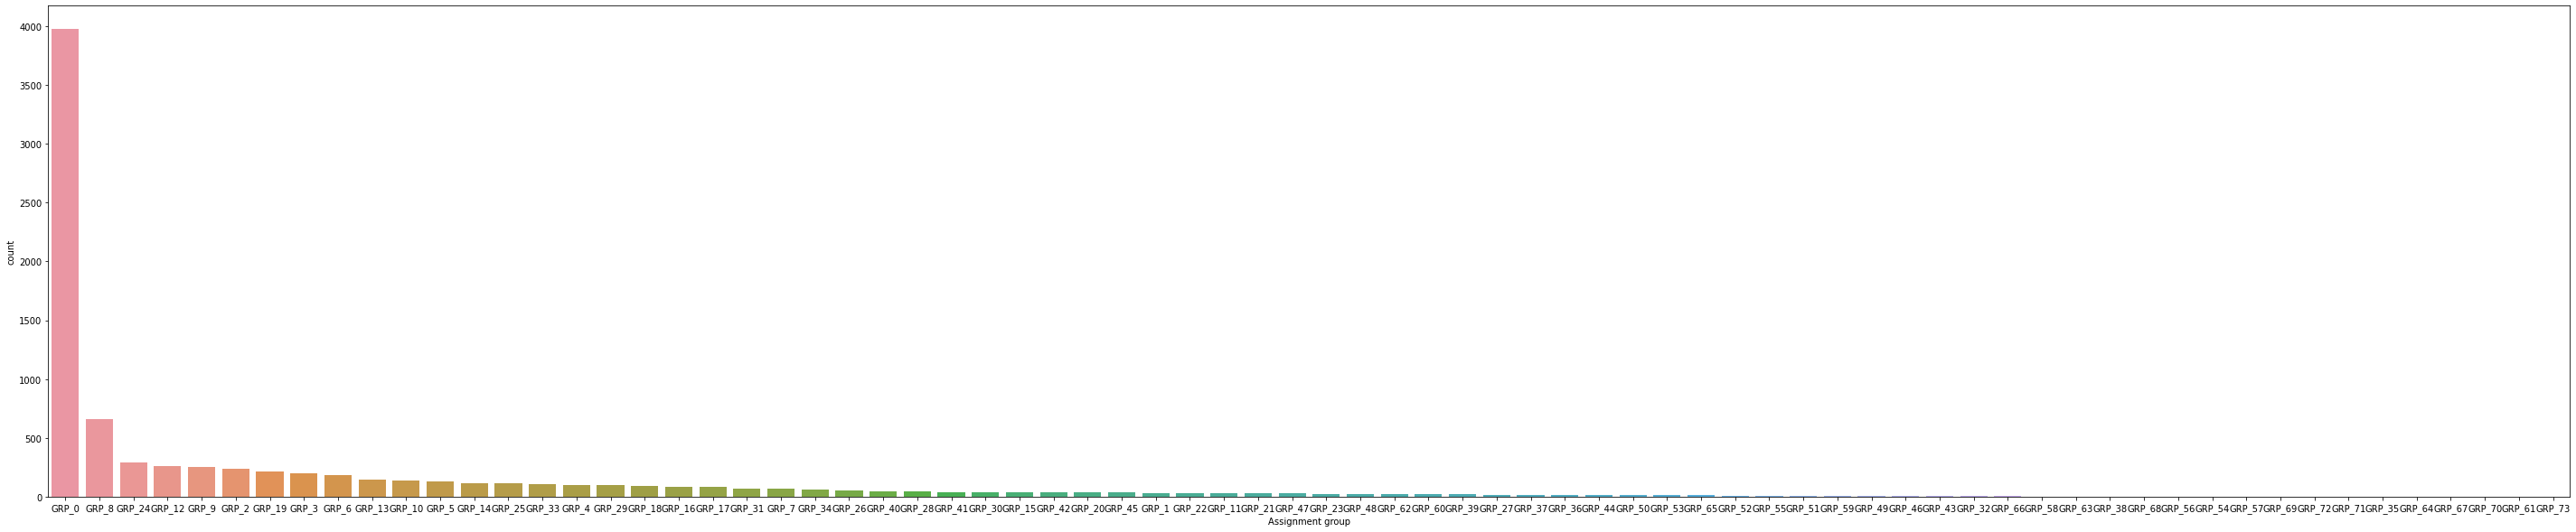

In [138]:
assignment_group_desc_order = ata_data['Assignment group'].value_counts().sort_values(ascending=False).index
plt.figure(figsize=(50,10))
sns.countplot(ata_data['Assignment group'], order=assignment_group_desc_order)

In [154]:
stop_words = set(stopwords.words('english'))

ata_data['number_of_words_short_desc'] = ata_data.short_desc_analysis.apply(lambda x: len(x.split()))
ata_data['number_of_char_short_desc'] = ata_data.short_desc_analysis.str.len()
ata_data['number_of_punctuations_short_desc'] = ata_data.short_desc_analysis.apply(lambda x : len([x for x in x if x in string.punctuation]))
ata_data['number_of_stop_words_short_desc'] = ata_data.short_desc_analysis.apply(lambda x: len([x for x in str(x).split() if x in stop_words]))




ata_data['number_of_words_desc'] = ata_data.desc_analysis.apply(lambda x: len(x.split()))
ata_data['number_of_char_desc'] = ata_data.desc_analysis.str.len()
ata_data['number_of_punctuations_desc'] = ata_data.desc_analysis.apply(lambda x : len([x for x in x if x in string.punctuation]))
ata_data['number_of_stop_words_desc'] = ata_data.desc_analysis.apply(lambda x: len([x for x in str(x).split() if x in stop_words]))

In [155]:
ata_data.head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned,number_of_words_desc,number_of_words_short_desc,number_of_char_short_desc,number_of_char_desc,number_of_punctuations_short_desc,number_of_punctuations_desc,number_of_stop_words_short_desc,number_of_stop_words_desc
0,login issue,-verified user details.(employee# & manager name)\r\n-checked the user name in ad and reset the password.\r\n-advised the user to login and check.\r\n-caller confirmed that he was able to login.\r\n-issue resolved.,spxjnwir pjlcoqds,GRP_0,login issue,-verified user details.(employee# & -checked the user name in ad and reset the password. -advised the user to login and check. -caller confirmed that he was able to login. -issue resolved.,No Match,No Match,31,2,11,188,0,13,0,11
1,outlook,"\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail.com\r\n\r\nhello team,\r\n\r\nmy meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct this?\r\n\r\nkind",hmjdrvpb komuaywn,GRP_0,outlook,"my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct t?",hmjdrvpb.komuaywn@gmail.com,No Match,19,1,7,117,0,3,0,8
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail.com\r\n\r\nhi\r\n\r\ni cannot log on to vpn\r\n\r\nbest,eylqgodm ybqkwiam,GRP_0,cannot log in to vpn,i cannot log on to vpn,eylqgodm.ybqkwiam@gmail.com,No Match,6,5,20,22,0,0,2,3
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page,unable to access hr_tool page,No Match,No Match,5,5,29,29,1,1,1,1
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error,skype error,No Match,No Match,2,2,11,11,0,0,0,0


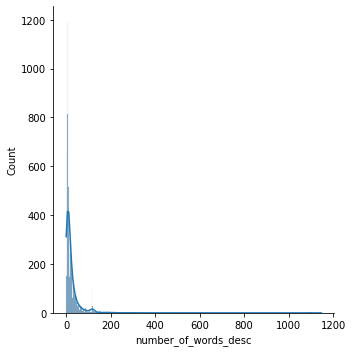

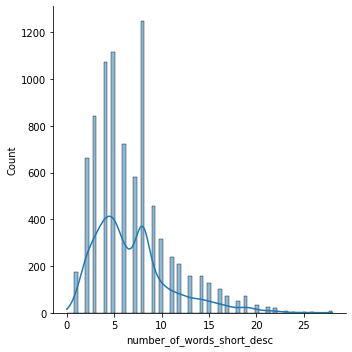

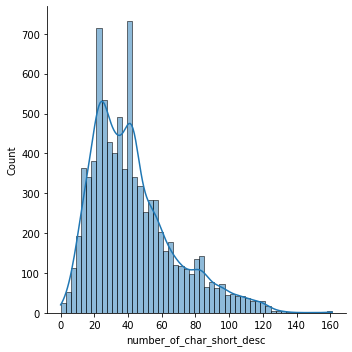

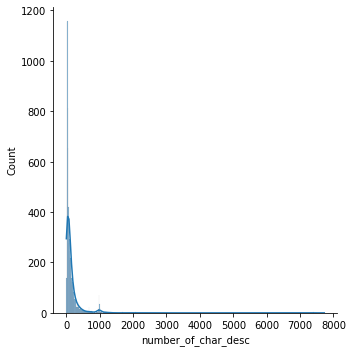

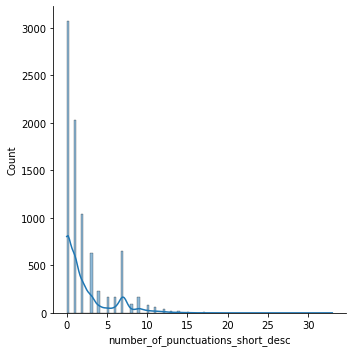

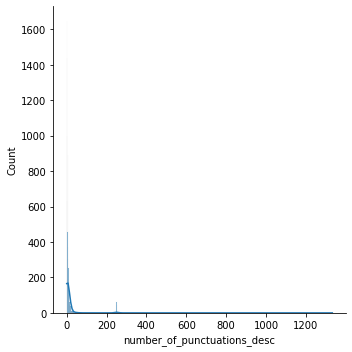

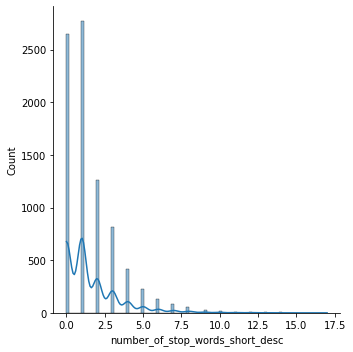

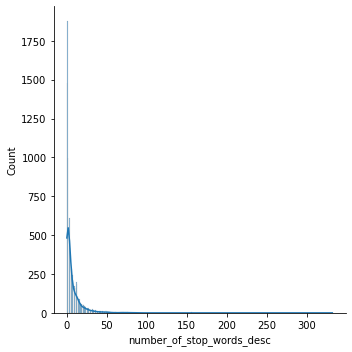

In [157]:
for displot_col in ata_data.select_dtypes(include = 'number').columns:
    sns.displot(ata_data, x = displot_col, kde=True)

In [74]:
ata_data['Caller'].value_counts()

bpctwhsn kzqsbmtp    810
ZkBogxib QsEJzdZO    151
fumkcsji sarmtlhy    134
rbozivdq gmlhrtvp     87
rkupnshb gsmzfojw     71
                    ... 
jecigpzw gqpmxwal      1
bftsxkre tqvelzks      1
mzdkgnvs svhkgyqb      1
ndsyovil pymzvdqa      1
pnacqfso ojwkmzcb      1
Name: Caller, Length: 2950, dtype: int64

In [ ]:
plt.figure(figsize = (20,20))
word_cloud = WordCloud(max_words = 5000 , width = 1600 , height = 800).generate(" ".join(ata_data['desc_analysis']))
plt.title('Description')
plt.imshow(word_cloud , interpolation = 'bilinear')

In [ ]:
plt.figure(figsize = (20,20))
word_cloud = WordCloud(max_words = 5000 , width = 1600 , height = 800).generate(" ".join(ata_data['short_desc_analysis']))
plt.title('Short Description')
plt.imshow(word_cloud , interpolation = 'bilinear')

In [ ]:
for grp in list(ata_data['Assignment group'].unique()):
  plt.figure(figsize = (20,20))
  word_cloud = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(ata_data[ata_data['Assignment group']==grp]['short_desc_analysis']))
  plt.title(grp)
  plt.imshow(word_cloud , interpolation = 'bilinear')

In [ ]:
for grp in list(ata_data['Assignment group'].unique()):
  plt.figure(figsize = (20,20))
  word_cloud = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(ata_data[ata_data['Assignment group']==grp]['desc_analysis']))
  plt.title(grp)
  plt.imshow(word_cloud , interpolation = 'bilinear')

## PLAY AREA

In [121]:
line = "should we use regex more often? let me know at  received from:321dsasdsa@dasdsa.com.lol"
match = re.search(r'received from: [\w\.-]+@[\w\.-]+', line)
#match.group(0)

In [80]:
if bool(match):
  print(match.group(0))
else:
  print("noth")
  

noth


In [81]:
ata_data[ata_data['Description'].str.contains('to:', case=False, na=False)].head()

,Short description,Description,Caller,Assignment group,short_desc_analysis,desc_analysis,mail_received_from,mail_subject_mentioned
53,reset scm_software password,"\n\nreceived from: cdbaoqts.wqbsodni@gmail.com\n\nhello,\n\nplease reset my scm_software password.\n\n\ncdbaoqts wqbsodni\nglobal product manager, markhtyeting initiatives\ncdbaoqts.wqbsodni@gmail.com<mailto:cdbaoqts.wqbsodni@gmail.com>\n\n\n\n\n\n",cdbaoqts wqbsodni,GRP_0,reset scm_software password,please reset my scm_software password. cdbaoqts wqbsodni global product,cdbaoqts.wqbsodni@gmail.com,No Match
100,re: ess portal access issue,"\n\nreceived from: noscwdpm.akiowsmp@gmail.com\n\nhello,\n\nhe is an kiosk user. please reset the password and confirm.\n\n\nnoscwdpm akiowsmp\nnoscwdpm.akiowsmp@gmail.com\n\nfrom: ihkolepb ozhnjyef\nsent: 29 october 2016 13:38\nto: company@ticketing_tool.com\nsubject: ess portal access issue\n\nhi,\n\nbelow mentioned employee krlszbqo spimolgz with user id sv123 is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.\n\n",noscwdpm akiowsmp,GRP_0,re: ess portal access issue,he is an kiosk user. please reset the password and confirm. noscwdpm akiowsmp below mentioned employee krlszbqo spimolgz with user id sv is not able to login to ess portal to access his pay slips and related contents. he is a attendance_tool user. please reset his user id and password and revert back.,noscwdpm.akiowsmp@gmail.com,ess portal access issue
124,mobile device activation,"from: tvcdfqgp nrbcqwgj \nsent: friday, october 28, 2016 3:13 pm\nto: nwfodmhc exurcwkm\nsubject: se ha bloqueado en forma temporal la sincronizaciÃ³n de su dispositivo mÃ³vil mediante exchange activesync hasta que su administrador autorice el acceso.\n\nhi\n\ni received this message and our local it expert has told me to open a ticket.\n\n",tvcdfqgp nrbcqwgj,GRP_0,mobile device activation,i received this message and our local it expert has told me to open a ticket.,No Match,se ha bloqueado en forma temporal la sincronización de su dispositivo móvil mediante exchange activesync hasta que su administrador autorice el acceso.
151,i used to have acces to this location on collaboration_platform. now i do not. i need access.,\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n,bwfhtumx japznrvb,GRP_16,i used to have acces to t location on collaboration_platform. now i do not. i need access.,bwfhtumx japznrvb regional controller,bwfhtumx.japznrvb@gmail.com,No Match
162,access to bex,"\r\n\r\nreceived from: yfqoaepn.xnezhsit@gmail.com\r\n\r\nhello,\r\n\r\ntill last week i was accessing bex reports using mms portal and there were no issues.\r\n\r\nstarting this week the system is incredibly slow when i log in and finally does not allow me to access any reports.\r\n\r\ncan it be the issue with any maintenance or my access rights or rather i should try to access bex using different way?\r\n\r\nbelow the print screen from what i see after log in:\r\n[cid:image001.png@01d2310c.f184b360]\r\n\r\ni am also able to get to finance reports (see below), however when i click ""profitability analysis"" (as i was always doing) separate window is open however apart rom that the screen is blank.\r\n[cid:image002.png@01d2310c.f184b360]\r\n\r\n\r\ni appreciate your support.\r\n\r\nhave a great day â˜º\r\n\r\nrobhyertyj\r\n\r\n\r\nyfqoaepn xnezhsit\r\nmanaging director\r\nfinance manager cee\r\nyfqoaepn.xnezhsit@gmail.com<mailto:yfqoaepn.xnezhsit@gmail.com>\r\ntel:+48(61)7767671\r\nmob:+48 694 425 760\r\n\r\ncompany polska sp. z o.o. , ul. krzywoustego 7, 61-144 poznaÅ„, www.company.com<\r\n\r\ncompany polska sp. z o.o. z siedzibÄ… w polandiu, 61-144 poznaÅ„, ul. krzywoustego 7.\r\nspÃ³Å‚ka zarejestrowana w sÄ…dzie rejonowym poznaÅ„-nowe miasto i wilda

In [82]:
text1 = 'from: mikhghytr wafglhdrhjop \nsent: thursday, august 04, 2016 8:50 pm\nto: nwfodmhc exurcwkm\nsubject: rak fw: ethics collaboration_platform site\n\nplease review your recent ticketing_tool tickets and let me know who modified the ethics collaboration_platform site. a few weeks ago i had requested a change that placed a third column of selections. not sure who or why this was undone.\n\nmikhghytr wafglhdrhjop\nsr. manager, global ethics and compliance programdntys\nfrom: kzbuhixt zjdmoahr \nsent: thursday, august 04, 2016 11:16 am\nto: mikhghytr wafglhdrhjop <azxhejvq.fyemlavd@gmail.com>\nsubject: re: ethics collaboration_platform site\n\nohâ€¦â€¦??\n\nsethdyr hdtyr\nassistant general counsel â€“ compliance and real estate\nglobal director of ethics & compliance; ccep\nkzbuhixt.zjdmoahr@gmail.com \n'

In [83]:
match_text1 = re.search(r'subject:.*[\r\n\t\f\v]', text1)
match_text1.group(0)

'subject: rak fw: ethics collaboration_platform site\n'

In [84]:
text2 = 'from: pacvbetl yptglhoe \r\nsent: thursday, august 04, 2016 10:59 pm\r\nto: nwfodmhc exurcwkm\r\nsubject: amar fw: case id [ref:_case-111121032:ref] :: others\r\n\r\nplease see the forwarded email below. this looks suspicious to me and may be some sort of phishing or spamming email. please review it and let me know if it looks legitimate and is from legitimate individuals at company. i did not open or view any of the attachments. \r\n\r\ni have no idea why accounts payable would be sending me an email.\r\n\r\nbest'

In [85]:
match_text2 = re.search(r'subject:.*[\r\n\t\f\v]', text2)
match_text2.group(0)

'subject: amar fw: case id [ref:_case-111121032:ref] :: others\r\n'

In [86]:
text3 = 'from: brdhdd dhwduw\nsent: thursday, october 27, 2016 6:12 am\nto: nwfodmhc exurcwkm\nsubject::fwd: unable to down load ethics module \n\n\nbegin forwarded message:\nfrom: <dqwhpjxy.pozjxbey@gmail.com>\nto: <zanivrec.capbfhur@gmail.com>\nsubject: unable to down load ethics module \nhi â€“ trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist.\n \nplease help.\n \n \n \n \n \ndirector of sales \ncompany indirect channels - asia \n& \ndqwhpjxy.pozjxbey@gmail.com \n\n \n \n \n \n\n\n'

In [87]:
match_text3 = re.search(r'from:.*[\r\n\t\f\v]', text3)
match_text3.group(0)

'from: brdhdd dhwduw\n'

In [88]:
match_text3.groups(1)

()

In [89]:
sub_text3 = match_text3.group(0).replace('subject:',"")
sub_text3

'from: brdhdd dhwduw\n'

In [90]:
match_text3 = re.findall(r'frm:.*[\r\n\t\f\v]', text3)
match_text3

[]

In [91]:
for text in match_text3:
  text3 = text3.replace(text, "")

In [92]:
text3

'from: brdhdd dhwduw\nsent: thursday, october 27, 2016 6:12 am\nto: nwfodmhc exurcwkm\nsubject::fwd: unable to down load ethics module \n\n\nbegin forwarded message:\nfrom: <dqwhpjxy.pozjxbey@gmail.com>\nto: <zanivrec.capbfhur@gmail.com>\nsubject: unable to down load ethics module \nhi â€“ trust doing well . i am unable to down load & getting below msg. i did reset resolution however still same issue persist.\n \nplease help.\n \n \n \n \n \ndirector of sales \ncompany indirect channels - asia \n& \ndqwhpjxy.pozjxbey@gmail.com \n\n \n \n \n \n\n\n'

In [93]:
a = ['it'] + ['was'] + ['annoying']
a

['it', 'was', 'annoying']

In [94]:
type(a)

list

In [95]:
text4 = '\n\nreceived from: bwfhtumx.japznrvb@gmail.com\n\n\n\n[cid:image001.jpg@01d230f7.8bb4e830]\n\nbwfhtumx japznrvb \nregional controller\nbwfhtumx.japznrvb@gmail.com<mailto:bwfhtumx.japznrvb@gmail.com>\n\n\n\n'

In [96]:
match_text4 = re.findall(r'\[cid:image.*\]', text4)
match_text4

['[cid:image001.jpg@01d230f7.8bb4e830]']

In [97]:
sentence = "Tanzania ni nchi inayoongoza kwa utalii barani afrika"
print(detect(sentence))

sw


In [98]:
sec_sen = " 不能连接"
print(detect(sec_sen))

ko


In [99]:
ftfy.fix_text('aktuell kÃ¶nnen keine rÃ¼ckmeldungen in EU_tool eingegeben werden. fehler "laufzeitfehler".')

'aktuell können keine rückmeldungen in EU_tool eingegeben werden. fehler "laufzeitfehler".'

In [100]:
ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚')

'电脑登录密码忘记,重置密码。'

In [101]:
ftfy.fix_text('skype error')

'skype error'

In [102]:
ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚')

'电脑登录密码忘记,重置密码。'

In [103]:
to_translate = ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚')
translated = GoogleTranslator(source='auto', target='english').translate(to_translate)

print(translated)

If the computer login password is forgotten, reset the password.


In [104]:
translate_to_english(ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚'))

'If the computer login password is forgotten, reset the password.'

In [105]:
translate_to_english(ftfy.fix_text('my name is'))

'my name is'

In [106]:
to_translate = ftfy.fix_text('aktuell kÃ¶nnen keine rÃ¼ckmeldungen in EU_tool eingegeben werden. fehler "laufzeitfehler".')
translated = GoogleTranslator(source='auto', target='english').translate(to_translate)

print(translated)

No feedback can currently be entered in EU_tool. error "runtime error".


In [107]:
to_translate = ftfy.fix_text('ç”µè„‘ç™»å½•å¯†ç å¿˜è®°ï¼Œé‡ç½®å¯†ç ã€‚')
translated = GoogleTranslator(source='auto', target='english').translate(to_translate)

print(translated)

If the computer login password is forgotten, reset the password.


In [108]:
len(translated)

64

In [109]:
ata_data[ata_data['Short description'].str.contains('login issue', case=False, na=False)]['Assignment group'].value_counts()

GRP_0     58
GRP_23     1
GRP_22     1
GRP_7      1
GRP_40     1
Name: Assignment group, dtype: int64

In [110]:
t1 = 'following  trail employee working in pthyu is unable to login  company hub mail id to view salary slip. request to rectify the same aerp mail id: hjsastadad.kjddwdd@company.com user id: wshqqhdqh password:vasanqi'
match_good_day_trial= re.findall(r'\S+@\S+', t1)
match_good_day_trial

['hjsastadad.kjddwdd@company.com']

In [111]:
t1 = 'following  trail employee working in pthyu is (yes/no/na) unable to login  company hub mail  id to view salary slip. request to rectify the same aerp mail id: hjsastadad.kjddwdd@company.com user id: wshqqhdqh password:vasanqi'
match_good_day_trial= re.findall(r'(\(yes/no/na\))', t1)
match_good_day_trial

['(yes/no/na)']

In [112]:
for matched_text in match_good_day_trial:
    t1 = t1.replace(matched_text, "")
t1

'following  trail employee working in pthyu is  unable to login  company hub mail  id to view salary slip. request to rectify the same aerp mail id: hjsastadad.kjddwdd@company.com user id: wshqqhdqh password:vasanqi'

In [113]:

match_hello_trial= re.search(r'(^|\s)(hello i.t. team|hello help-team|hello support team|hello help-team|hello it-team|hello ladies and gentlemen|hello  it helper|hellow|hello it support|hello all|hello colleagues|hi there|hello it team|hello sir|hello it service|hello it|hello helpdesk|hello team|hello all|hello it desk|hello  it helper|hello dac|hello|gentles|it team|dear team|dear all|dear|hallo|all groups|it help)(,|\s|!|.|:|;|<|~)', 'dear team,  please release the device as per attached form as an employee owned mobile device. the corresponding form is attached. for the moment i am using the outlook app.  hello joftgost,  please approve the form in return by mail.')
match_hello_trial

<re.Match object; span=(0, 10), match='dear team,'>

In [114]:
match_hello_trial.group(0)

'dear team,'

In [115]:
match_hello_trial.group(1)

''

In [116]:
match_hello_trial.group(2)

'dear team'

In [117]:
match_hello_trial.group(3)

','

In [118]:
match_hello_trial

<re.Match object; span=(0, 10), match='dear team,'>

In [119]:
text = '''i had to reset my password again and i've lost my option for setting up a skype meeting again.  can you please help me?  i can't recall how you were able to bring it back the last time.'''
  
contractions.fix(text)

'i had to reset my password again and I have lost my option for setting up a skype meeting again.  can you please help me?  i cannot recall how you were able to bring it back the last time.'

In [120]:
text_check = '......my meetings/skype meetings etc are not appearing in my outlook calendar, can somebody please advise how to correct t?..'

match_text_check = re.match(r'^[.]*', text_check)
match_text_check

<re.Match object; span=(0, 6), match='......'>